## **Seaborn 1 - Distribution Plots**

In [1]:
import seaborn as sns

In [3]:
%matplotlib inline

In [6]:
#loading an in-built dataset of seaborn

In [8]:
tips = sns.load_dataset('tips')

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\grv06\AppData\Local\Temp\ipykernel_51796\4271412032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


<Axes: xlabel='total_bill', ylabel='Density'>

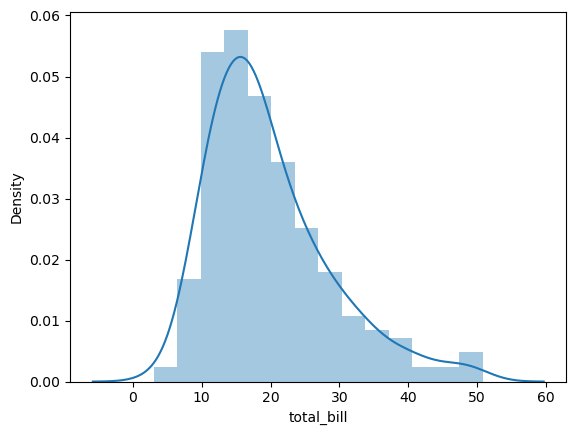

In [19]:
sns.distplot(tips['total_bill'])

In [223]:
#displot now was distplot formerly.

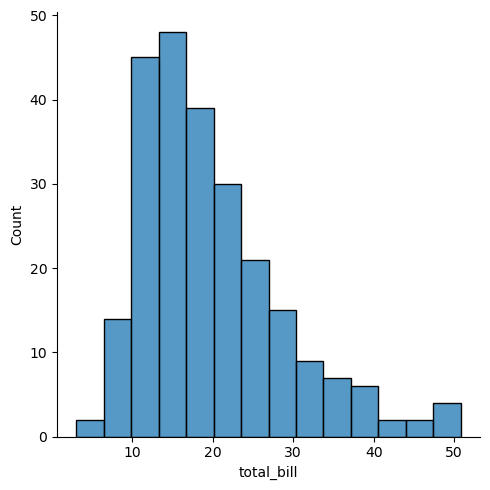

In [22]:
sns.displot(tips['total_bill'])

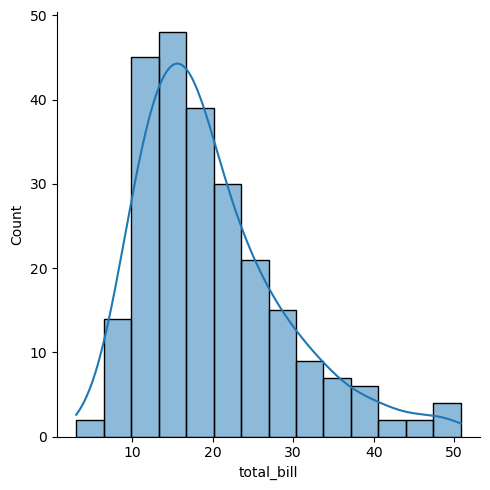

In [26]:
sns.displot(tips['total_bill'],kde=True)

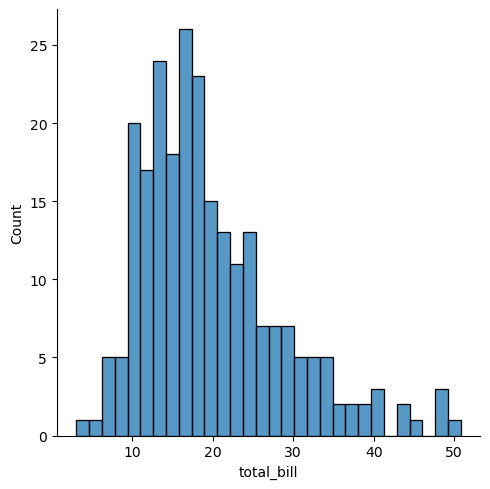

In [32]:
sns.displot(tips['total_bill'],bins=30)

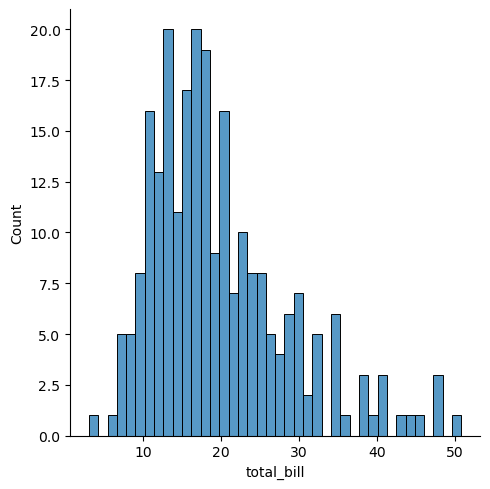

In [35]:
sns.displot(tips['total_bill'],bins=40)

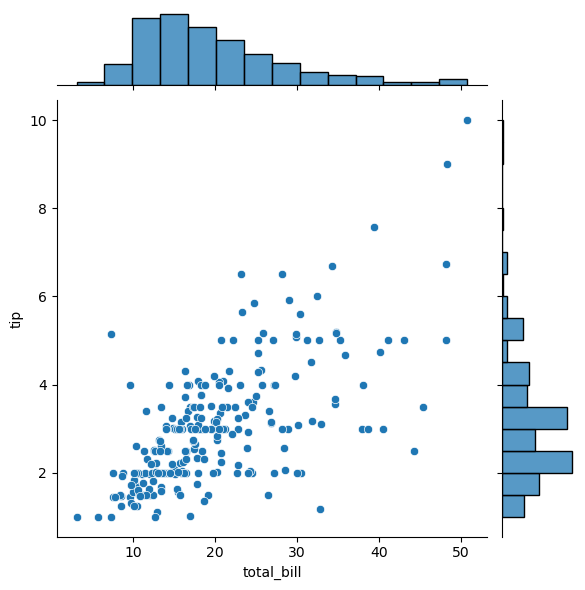

In [38]:
sns.jointplot(x='total_bill',y='tip',data=tips)

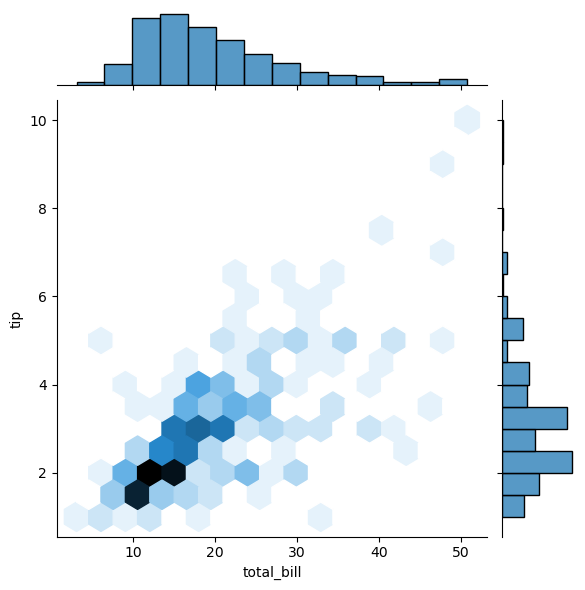

In [41]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

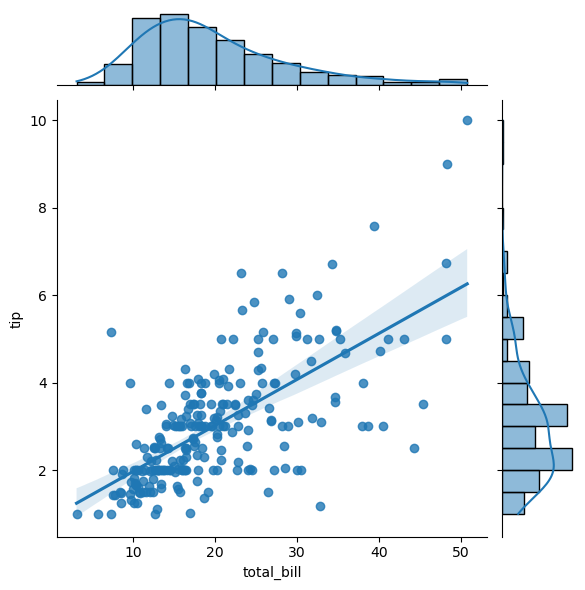

In [44]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

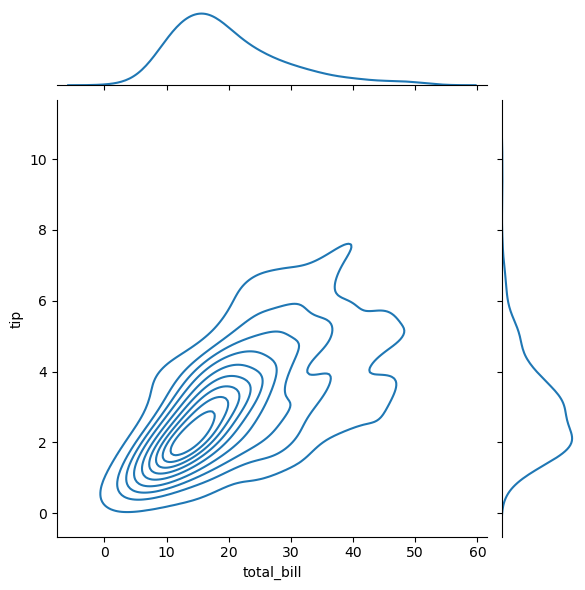

In [47]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

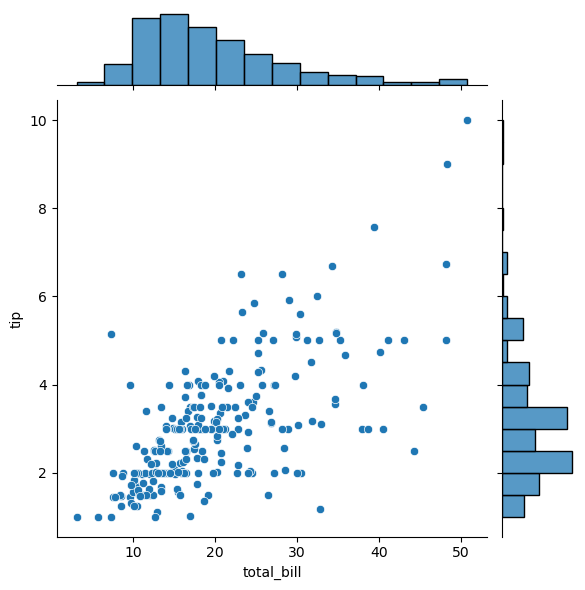

In [50]:
sns.jointplot(x='total_bill',y='tip',data=tips)

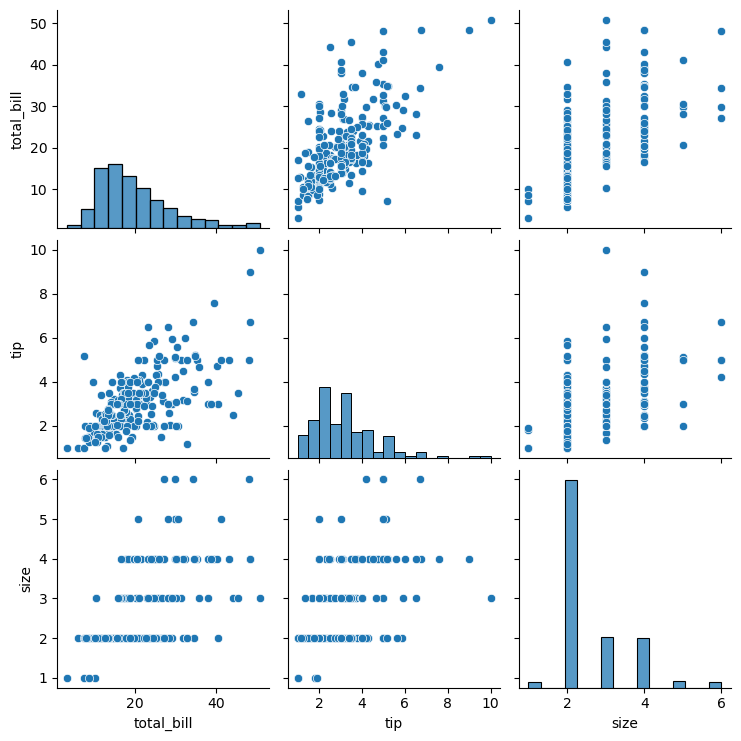

In [57]:
sns.pairplot(tips)
#it creates jointplot for every numeric pair possible in the dataset.

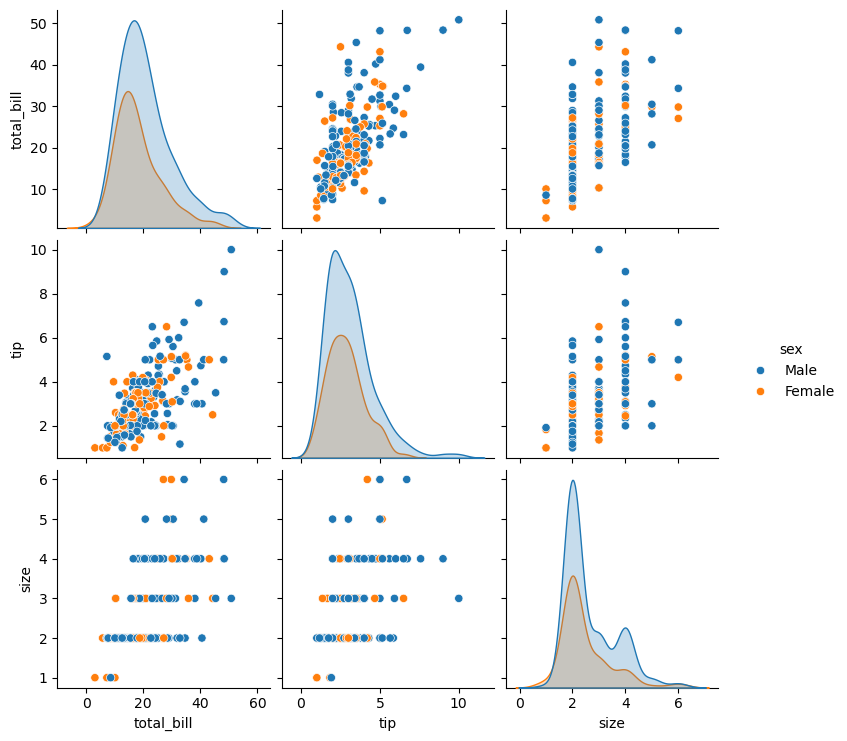

In [60]:
sns.pairplot(tips,hue='sex')
#color codes data points on the basis of sex

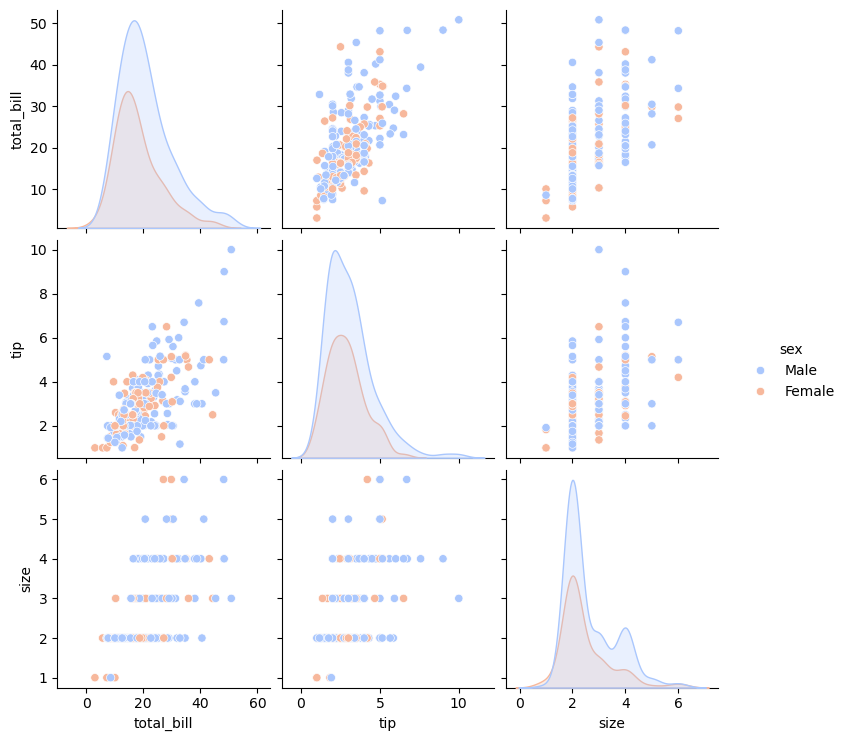

In [63]:
sns.pairplot(tips,hue='sex', palette='coolwarm')

<Axes: xlabel='total_bill'>

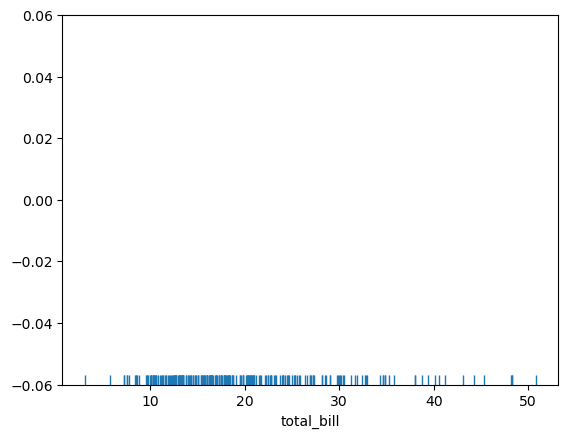

In [66]:
sns.rugplot(tips['total_bill'])

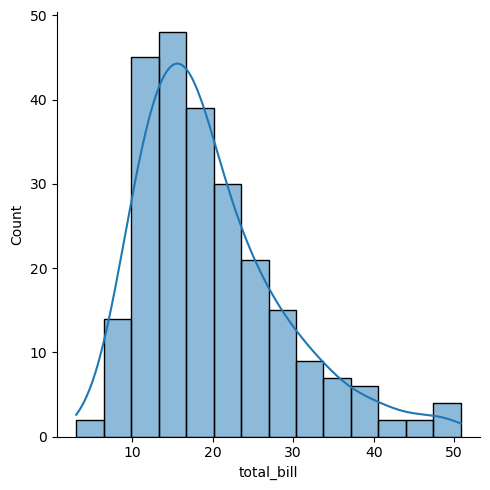

In [76]:
sns.displot(tips['total_bill'], kde=True)
#kde means Kernel Density Estimation

In [78]:
#Let's dive into how this kde plot is obtained.
#First we make normal distribution at each point on x-axis.
#Then, we sum them up to get kde.

(0.0, 1.0)

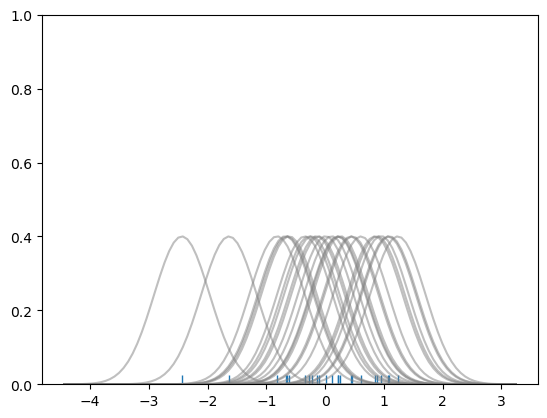

In [80]:
##Creating normal distribution at each point on x-axis.
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

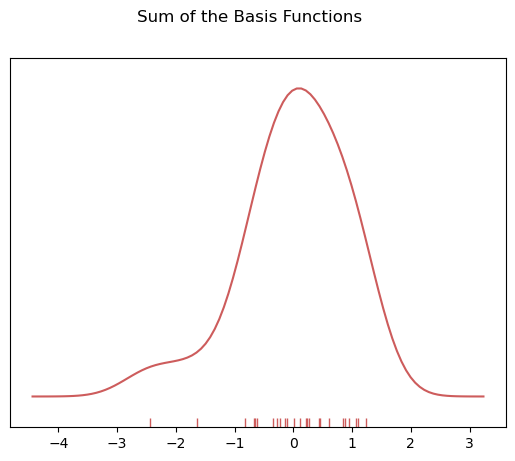

In [86]:
## Now, summing them up to get kde.
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<Axes: xlabel='total_bill', ylabel='Density'>

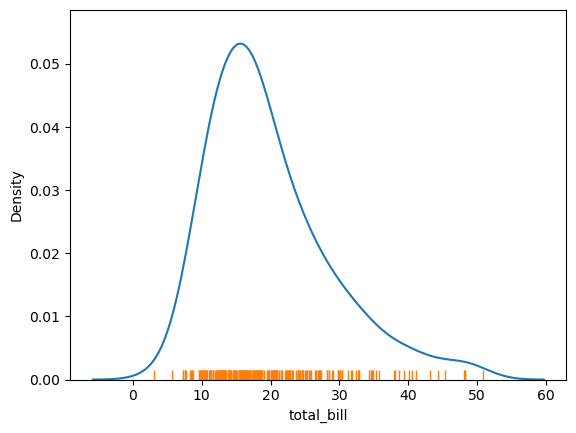

In [88]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

## **Seaborn 2 - Categorical Plots**

In [95]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='total_bill'>

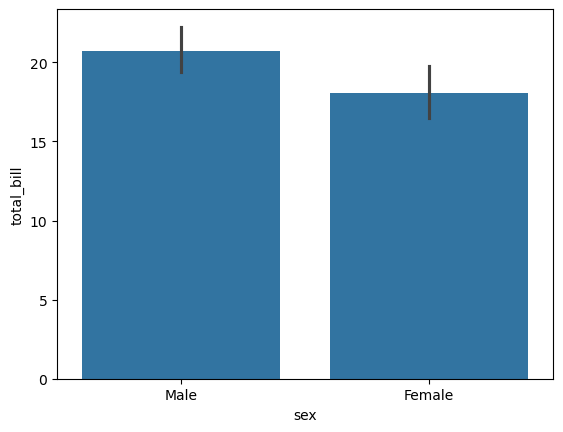

In [98]:
sns.barplot(x='sex',y='total_bill',data=tips)
#this shows the bars for male & female on x-axis and their avg. bill on y-axis.

<Axes: xlabel='sex', ylabel='total_bill'>

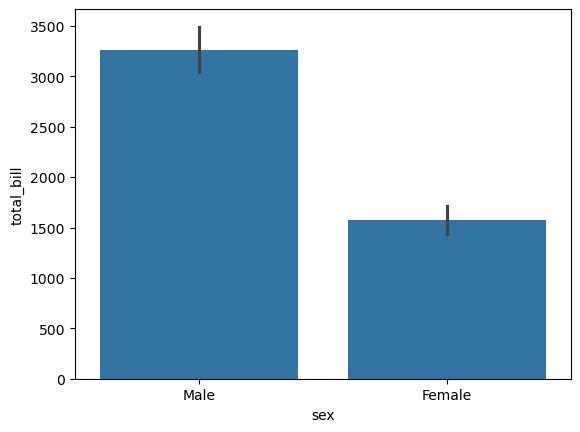

In [103]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator='sum')
#this shows the bars for male & female on x-axis and their bill sum on y-axis.

In [106]:
import numpy as np

<Axes: xlabel='sex', ylabel='total_bill'>

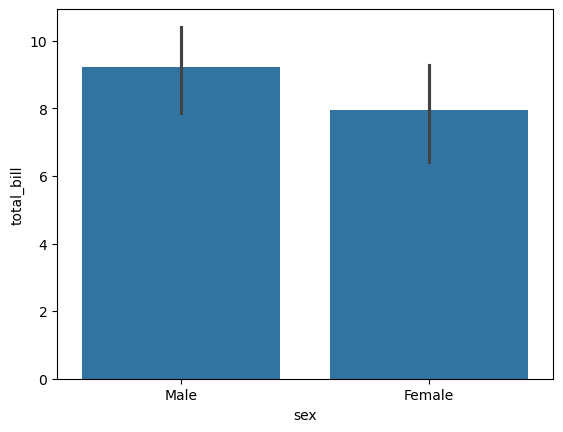

In [108]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
#male & female on x-axis and their bill standard deviation on y-axis.

<Axes: xlabel='sex', ylabel='total_bill'>

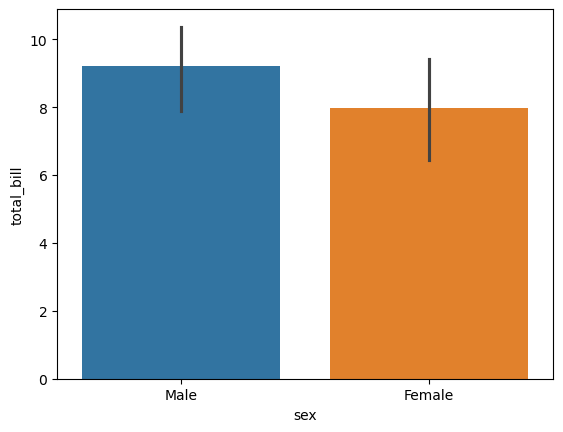

In [110]:
sns.barplot(x='sex',y='total_bill',data=tips,hue='sex',estimator=np.std)

<Axes: xlabel='sex', ylabel='count'>

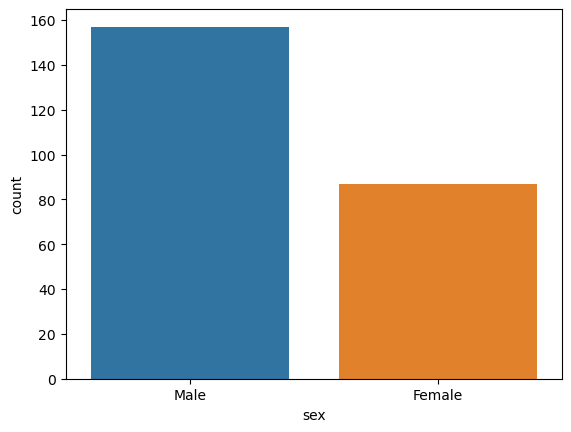

In [116]:
sns.countplot(x='sex',data=tips,hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

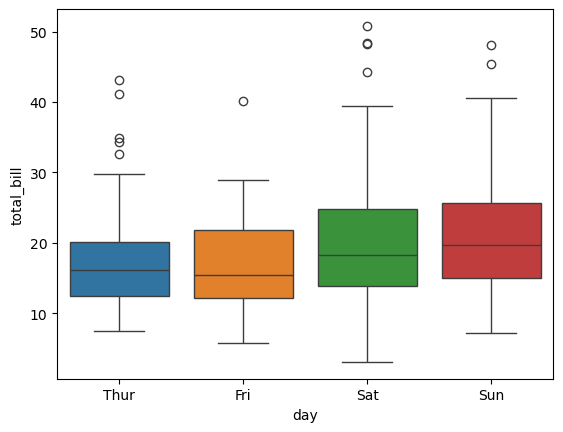

In [123]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='day')

In [125]:
#above figure shows 4 quartiles. dots outside are outliers.

<Axes: xlabel='day', ylabel='total_bill'>

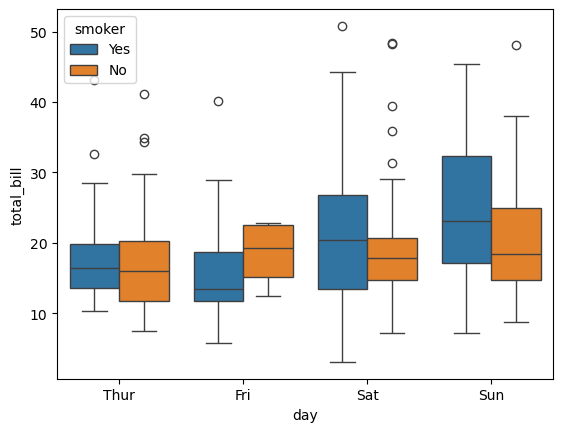

In [129]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

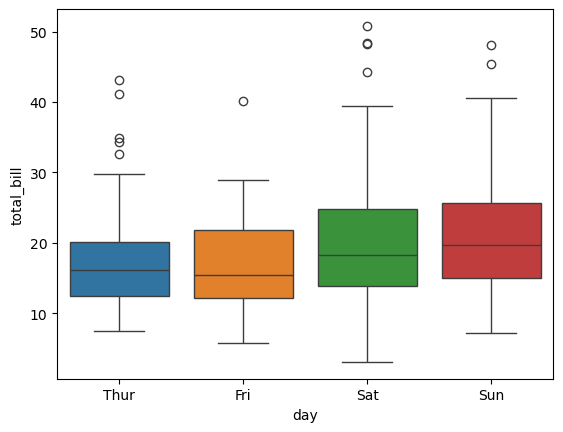

In [137]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='day')

<Axes: xlabel='day', ylabel='total_bill'>

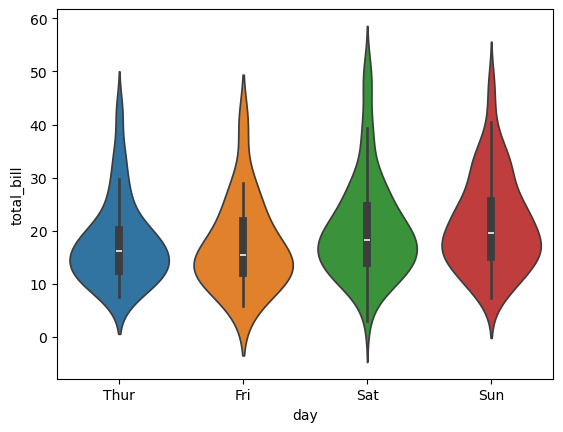

In [135]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='day')

In [ ]:
# difference btwn boxplot and violinplot is that 
# violinplot considers outliers as well

<Axes: xlabel='day', ylabel='total_bill'>

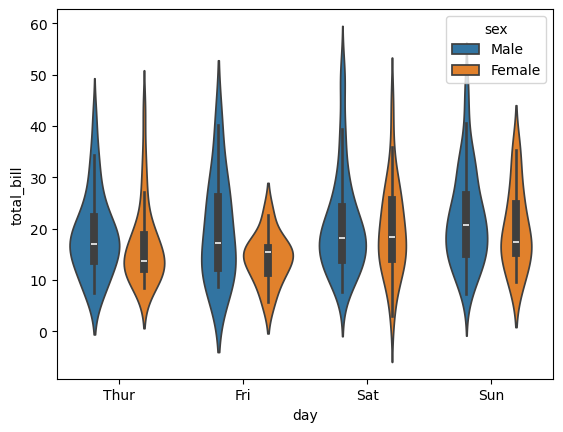

In [142]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex')

<Axes: xlabel='day', ylabel='total_bill'>

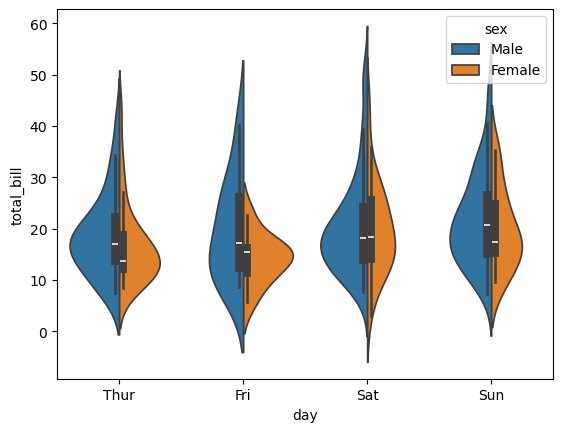

In [145]:
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split=True)

<Axes: xlabel='day', ylabel='total_bill'>

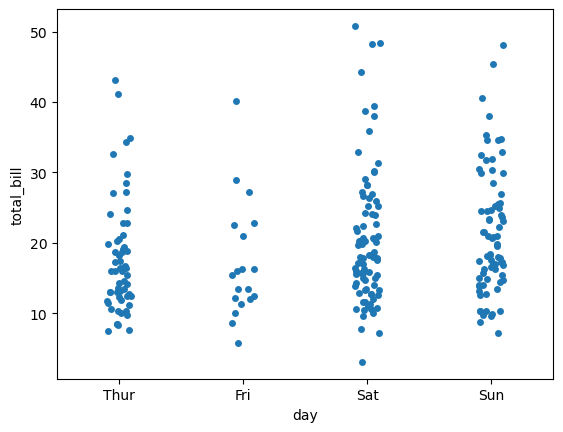

In [150]:
sns.stripplot(x='day',y='total_bill',data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

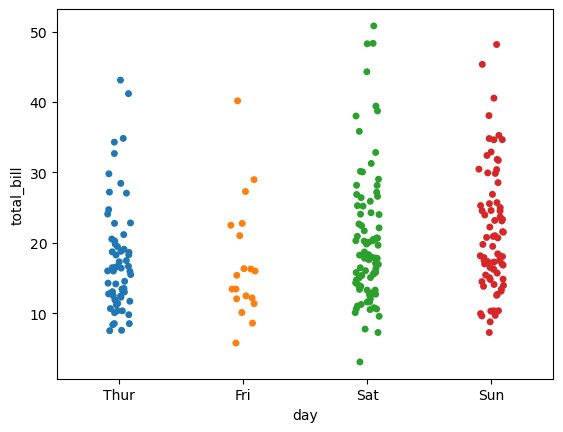

In [155]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='day')

<Axes: xlabel='day', ylabel='total_bill'>

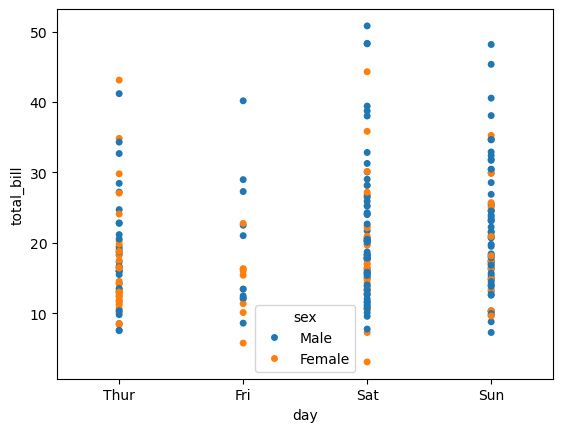

In [164]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex',jitter=False)

<Axes: xlabel='day', ylabel='total_bill'>

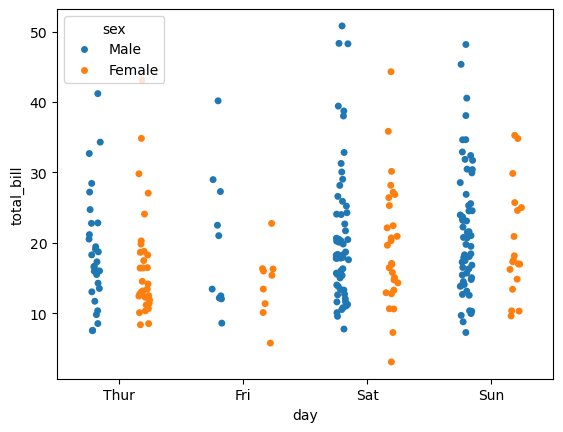

In [175]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

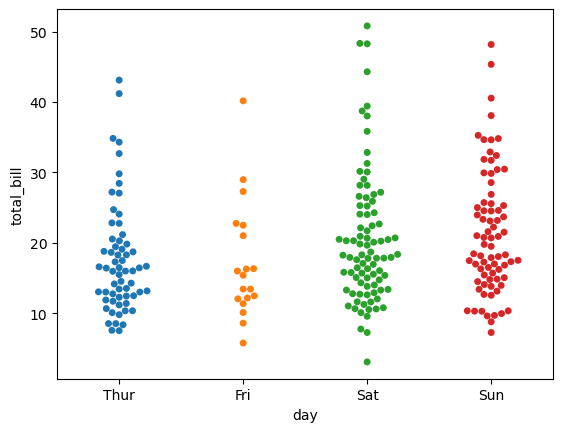

In [191]:
#Mixture of violinplot and stripplot:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='day')

<Axes: xlabel='day', ylabel='total_bill'>

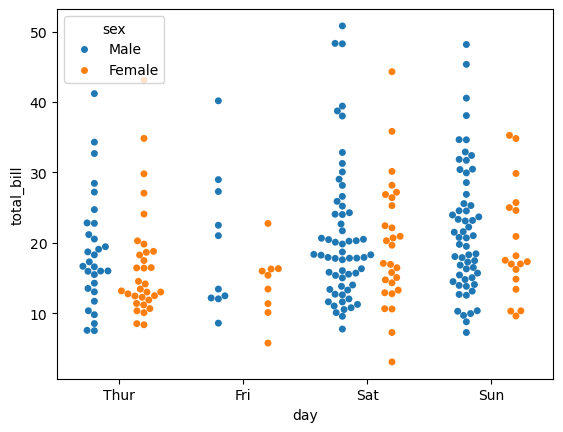

In [194]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',dodge=True)

<Axes: xlabel='day', ylabel='total_bill'>

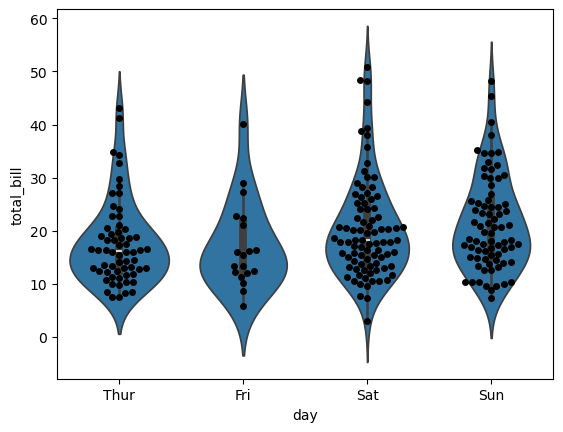

In [202]:
#swarmplot is dotted while violinplot is plain. Almost same in shape.
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

In [220]:
#The most general Categorical Plot is catplot (factorplot formerly)

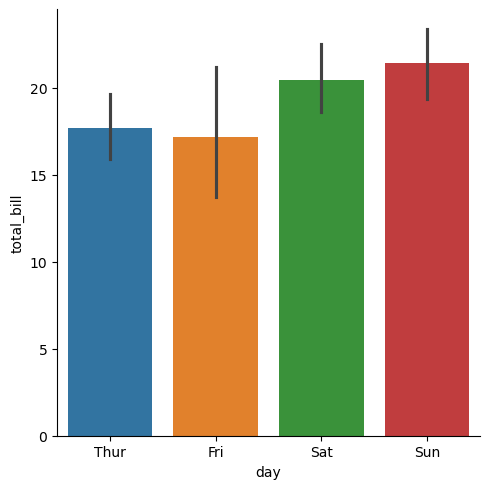

In [218]:
sns.catplot(x='day',y='total_bill',data=tips,hue='day',kind='bar')

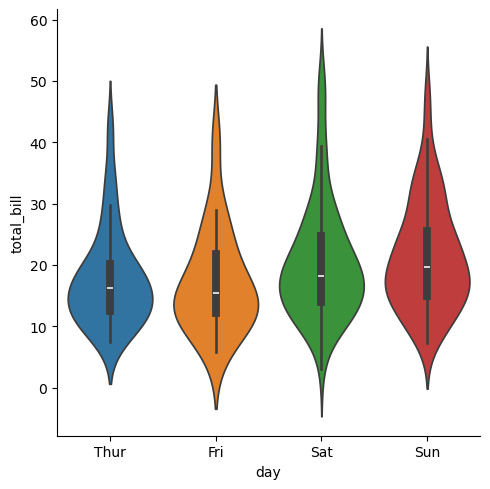

In [225]:
sns.catplot(x='day',y='total_bill',data=tips,hue='day',kind='violin')

## **Seaborn 3 - Matrix Plots**

In [238]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [233]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [246]:
tips.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [248]:
tc = tips.corr(numeric_only=True)

<Axes: >

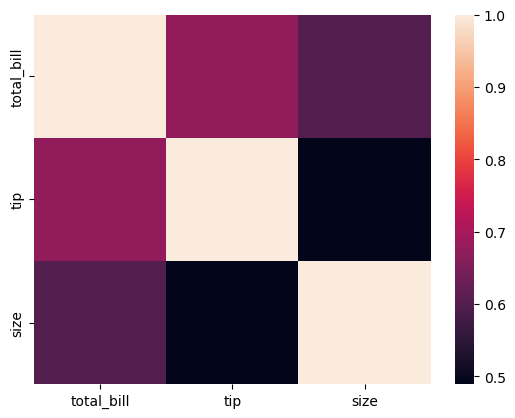

In [250]:
sns.heatmap(tc)

<Axes: >

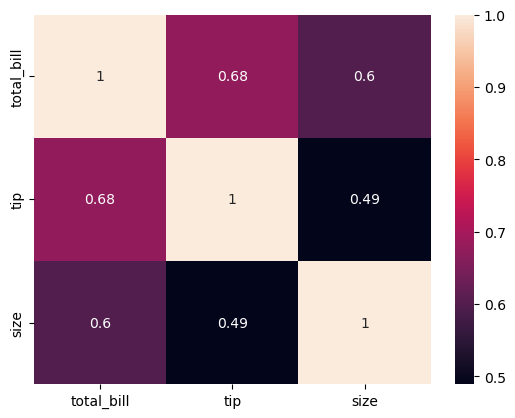

In [253]:
sns.heatmap(tc, annot=True)

<Axes: >

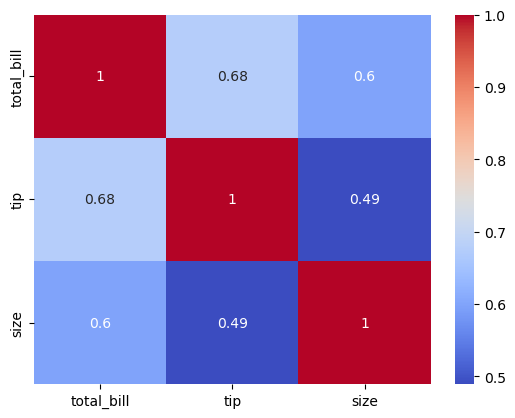

In [256]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [260]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [270]:
flights.pivot_table(index='month',columns='year',values='passengers',observed=True)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


In [272]:
fp = flights.pivot_table(index='month',columns='year',values='passengers',observed=True)

<Axes: xlabel='year', ylabel='month'>

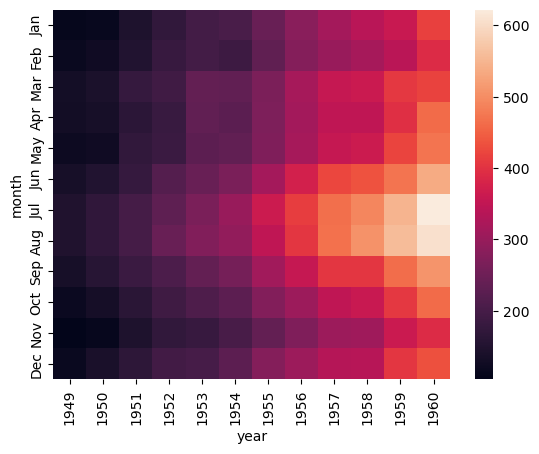

In [274]:
sns.heatmap(fp)

<Axes: xlabel='year', ylabel='month'>

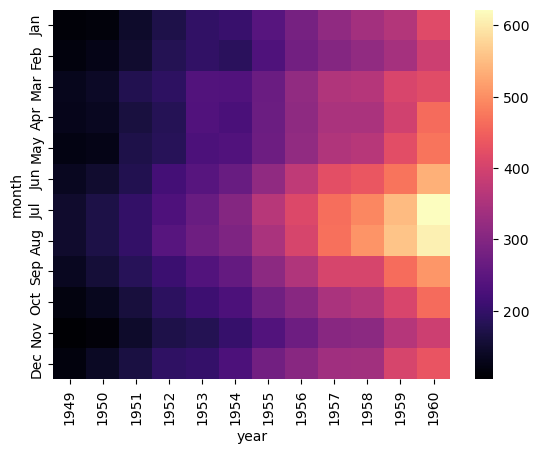

In [277]:
sns.heatmap(fp,cmap='magma')

<Axes: xlabel='year', ylabel='month'>

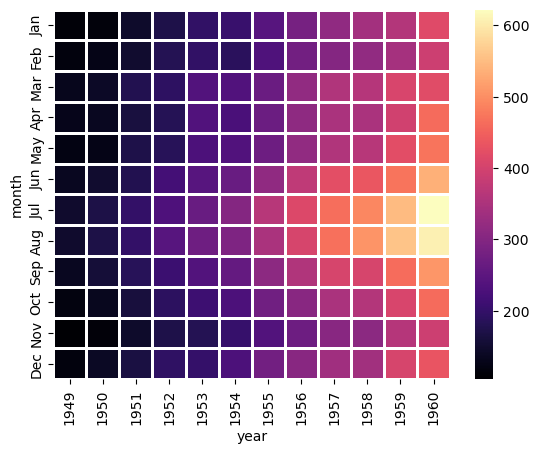

In [280]:
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=1)

<Axes: xlabel='year', ylabel='month'>

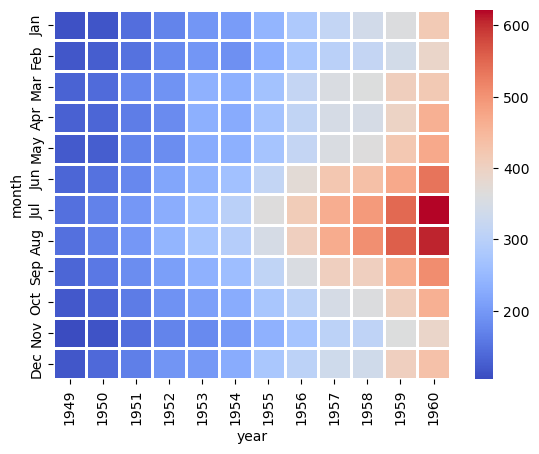

In [283]:
sns.heatmap(fp,cmap='coolwarm',linecolor='white',linewidth=1)

<Axes: xlabel='year', ylabel='month'>

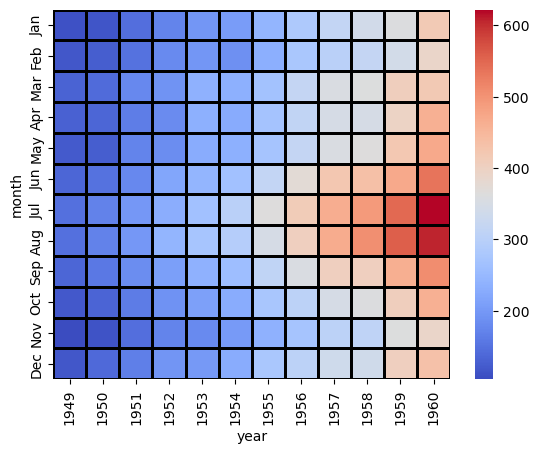

In [286]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidth=1)

<Axes: xlabel='year', ylabel='month'>

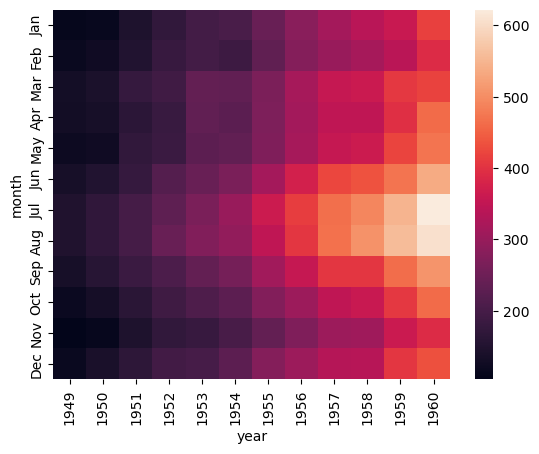

In [289]:
sns.heatmap(fp)

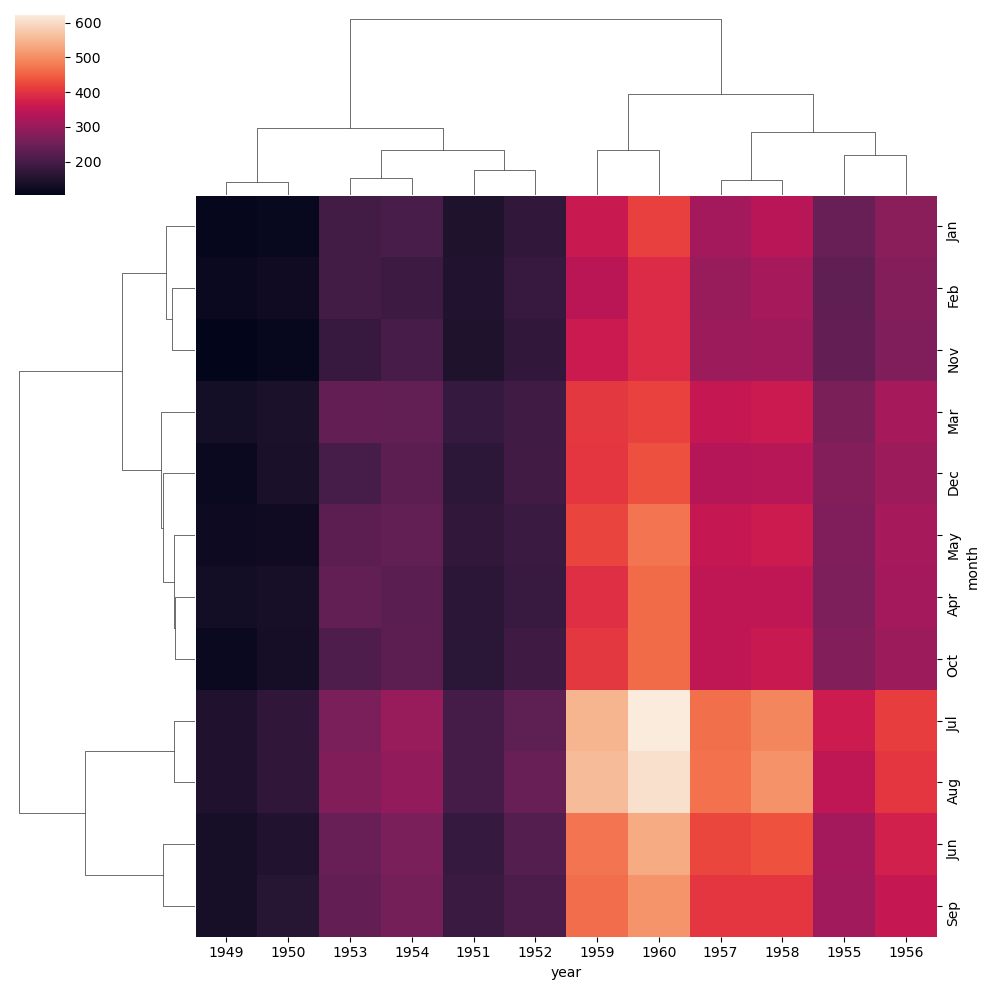

In [293]:
sns.clustermap(fp)

In [295]:
#Now the month and year are not in sequence.
#months and years with similar values are being put together.

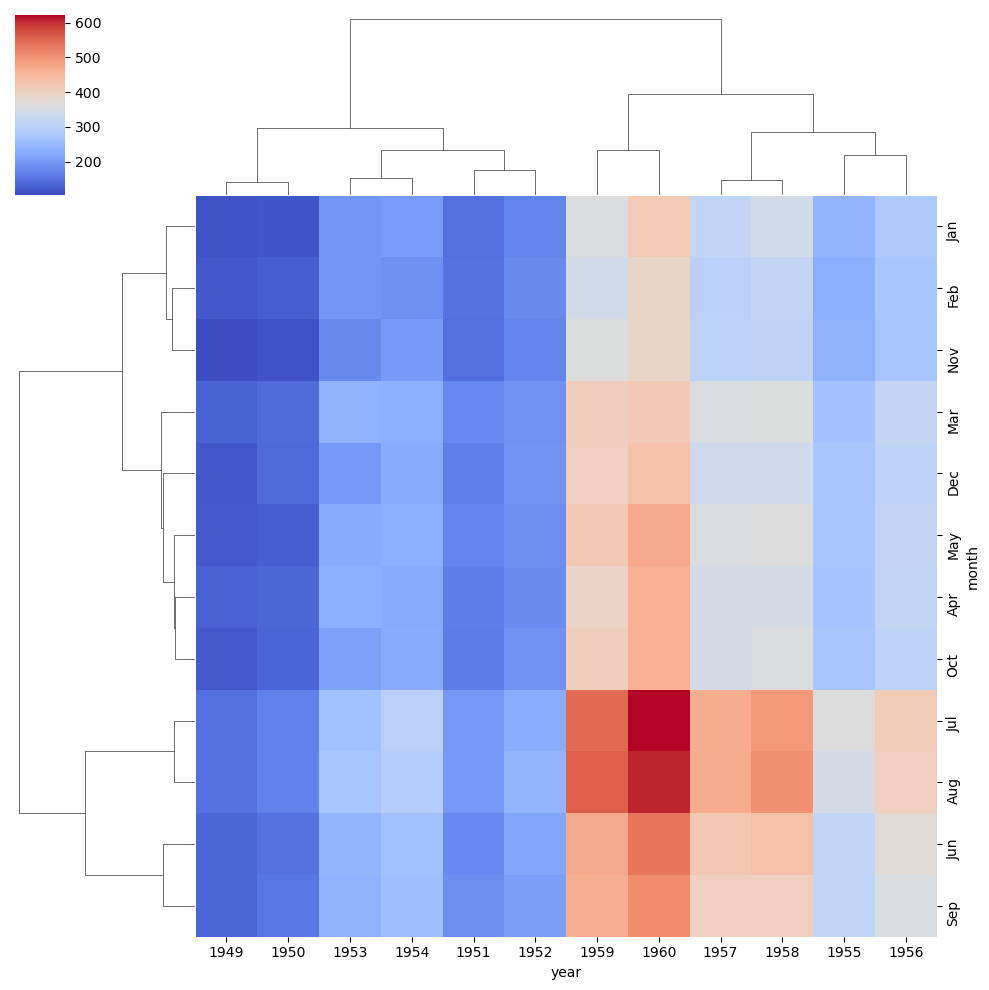

In [298]:
sns.clustermap(fp,cmap='coolwarm')

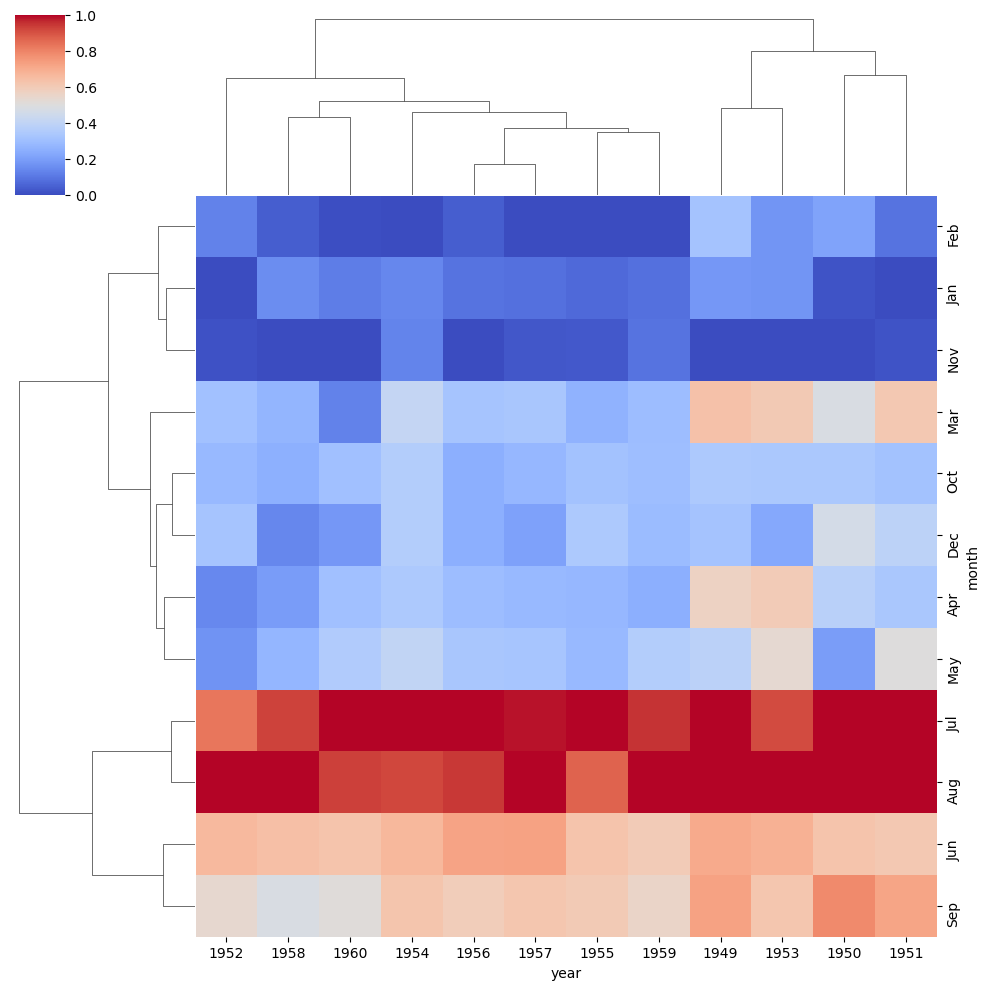

In [301]:
#normalize using standard scale.
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [307]:
#heatmap keeps the order u provide.
#clustermap changes the order to make similar things close to each other.

## **Seaborn 4 - Grids**

In [314]:
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [317]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

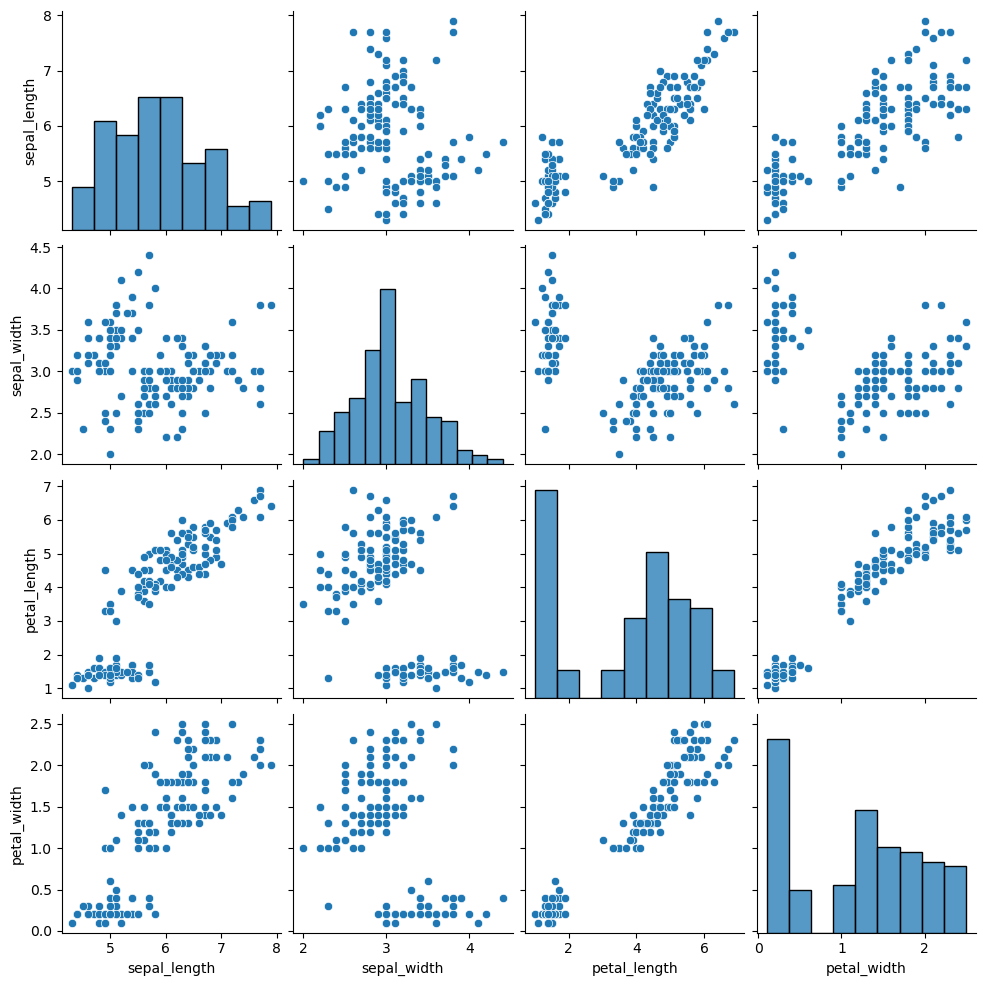

In [320]:
sns.pairplot(iris)

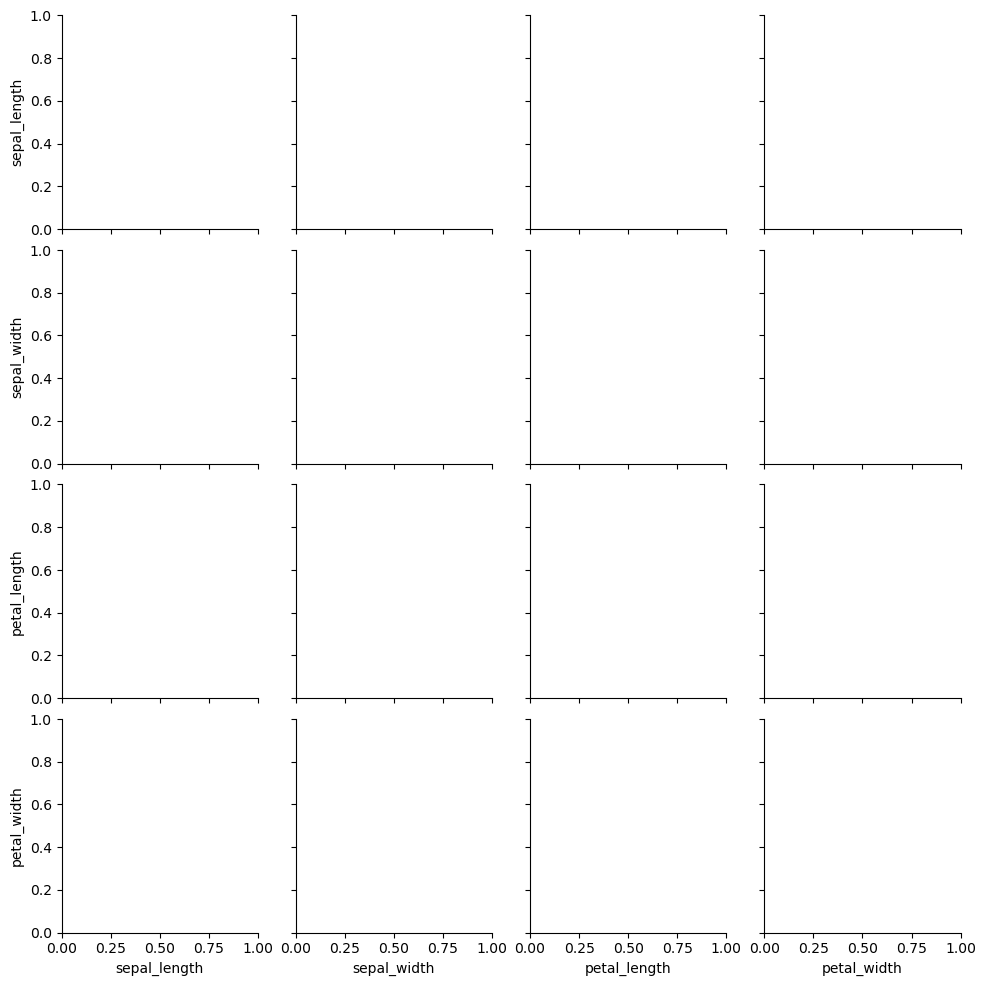

In [324]:
sns.PairGrid(iris)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1550: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, colo

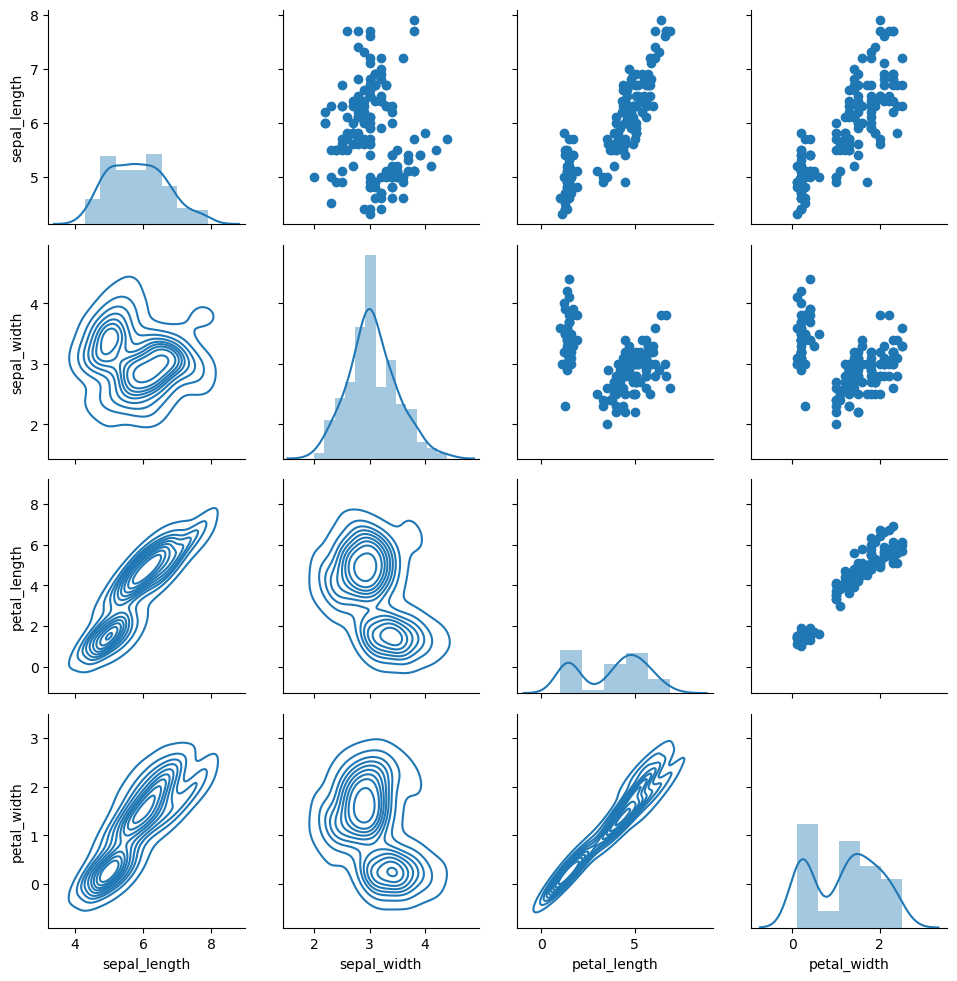

In [332]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [336]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\s

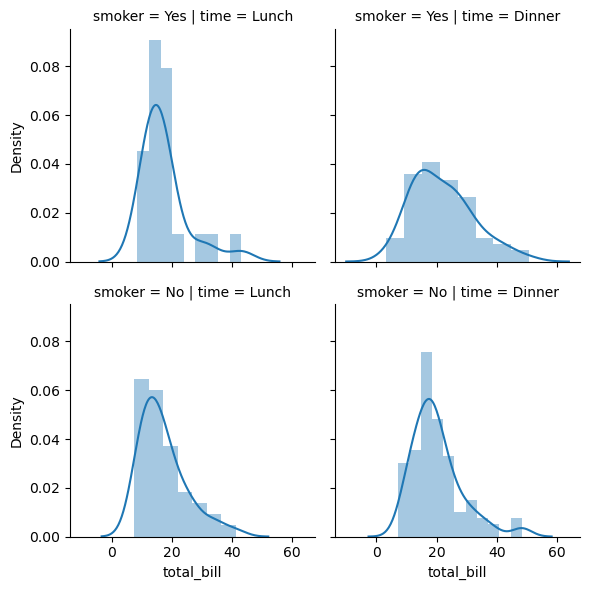

In [340]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')

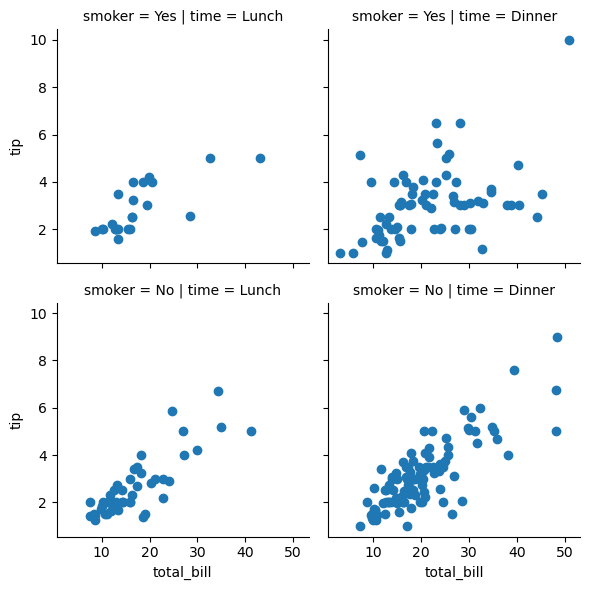

In [345]:
g=sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

## **Seaborn 5 - Regression Plots**

In [351]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


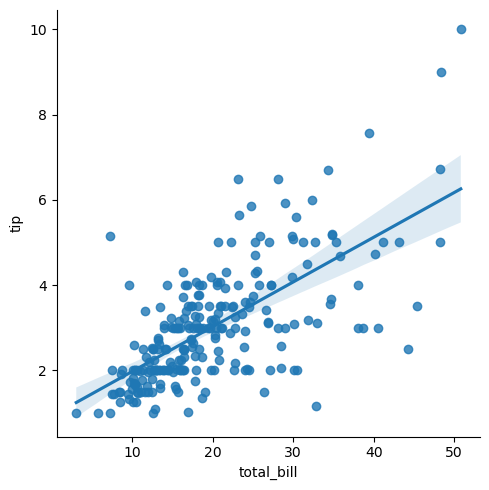

In [353]:
sns.lmplot(x='total_bill',y='tip',data=tips)

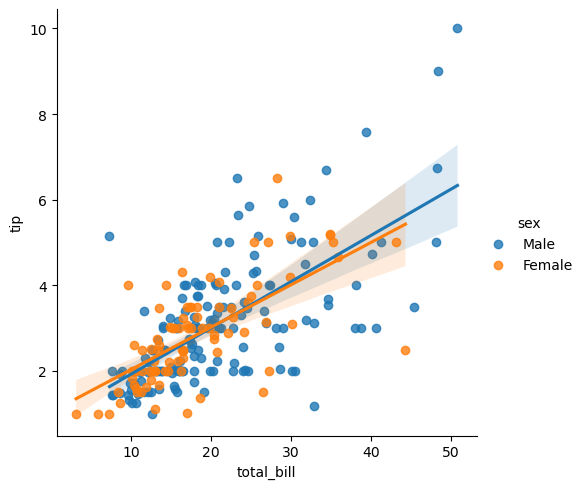

In [356]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex')

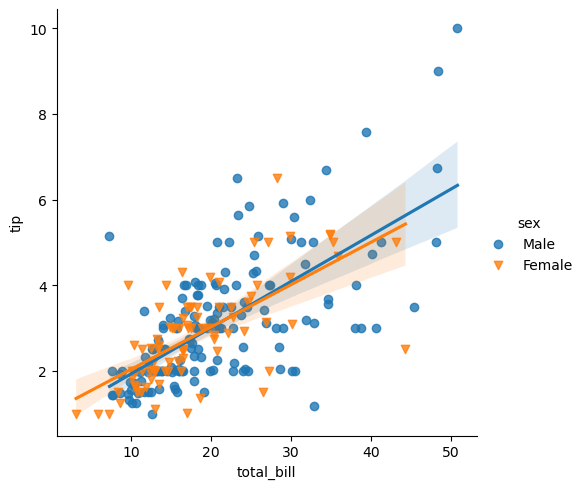

In [359]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', markers=['o','v'])

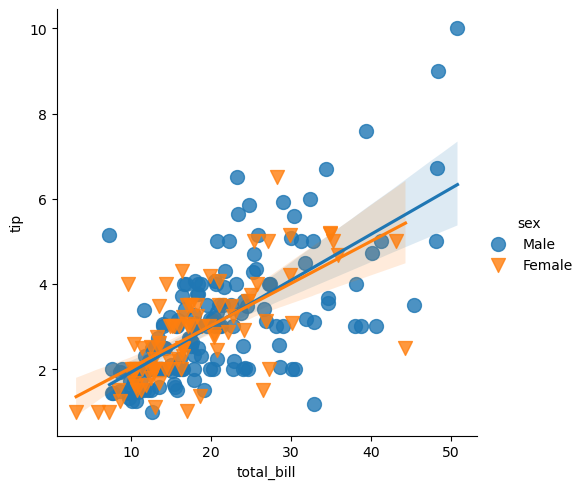

In [371]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', 
           markers=['o','v'], scatter_kws={'s':100})
#scatter_kws increases the size of markers to 100
# s is for the size of the scatterplot

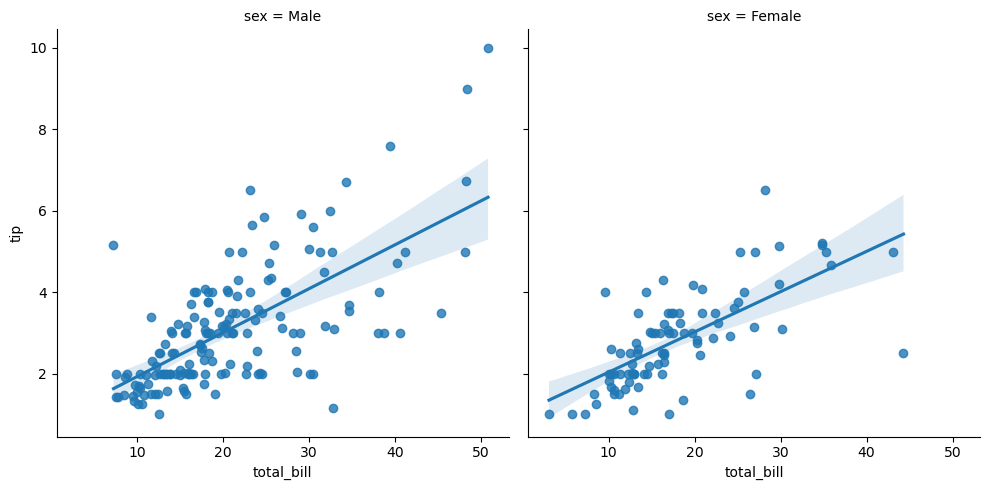

In [375]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

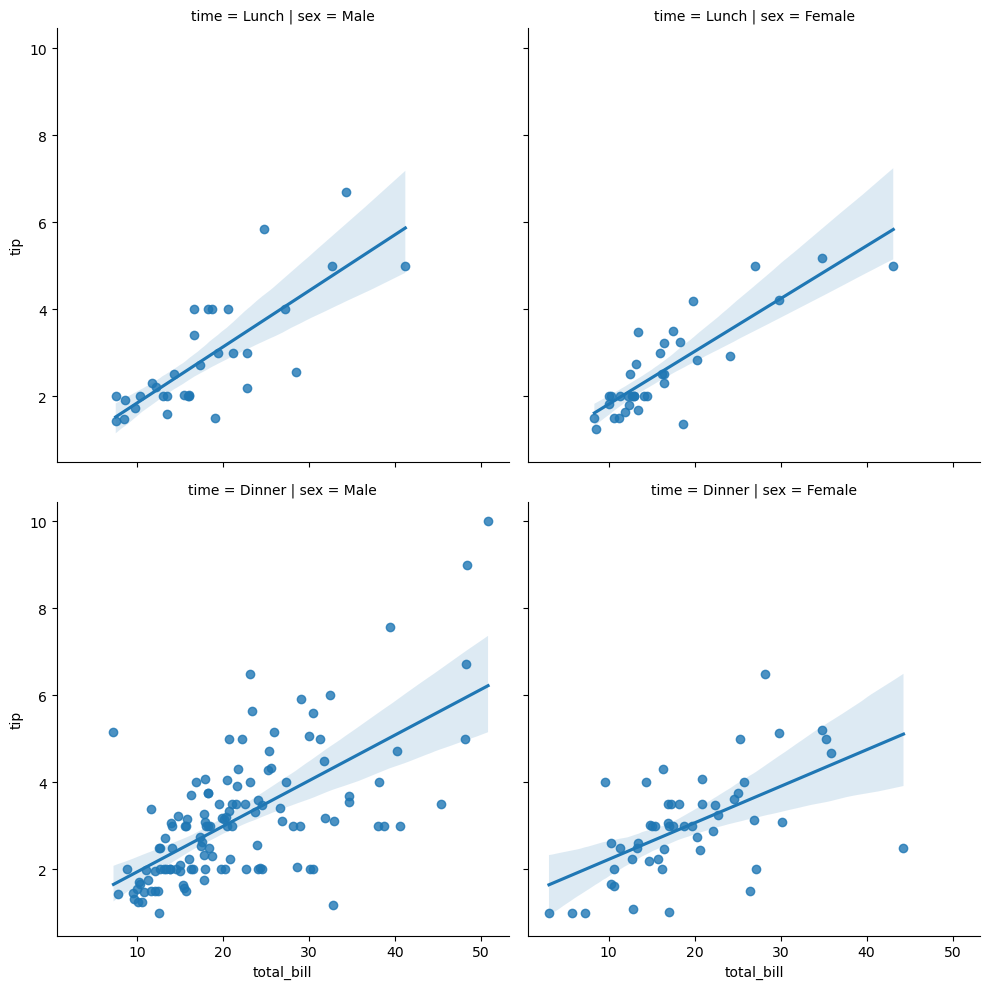

In [378]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time')

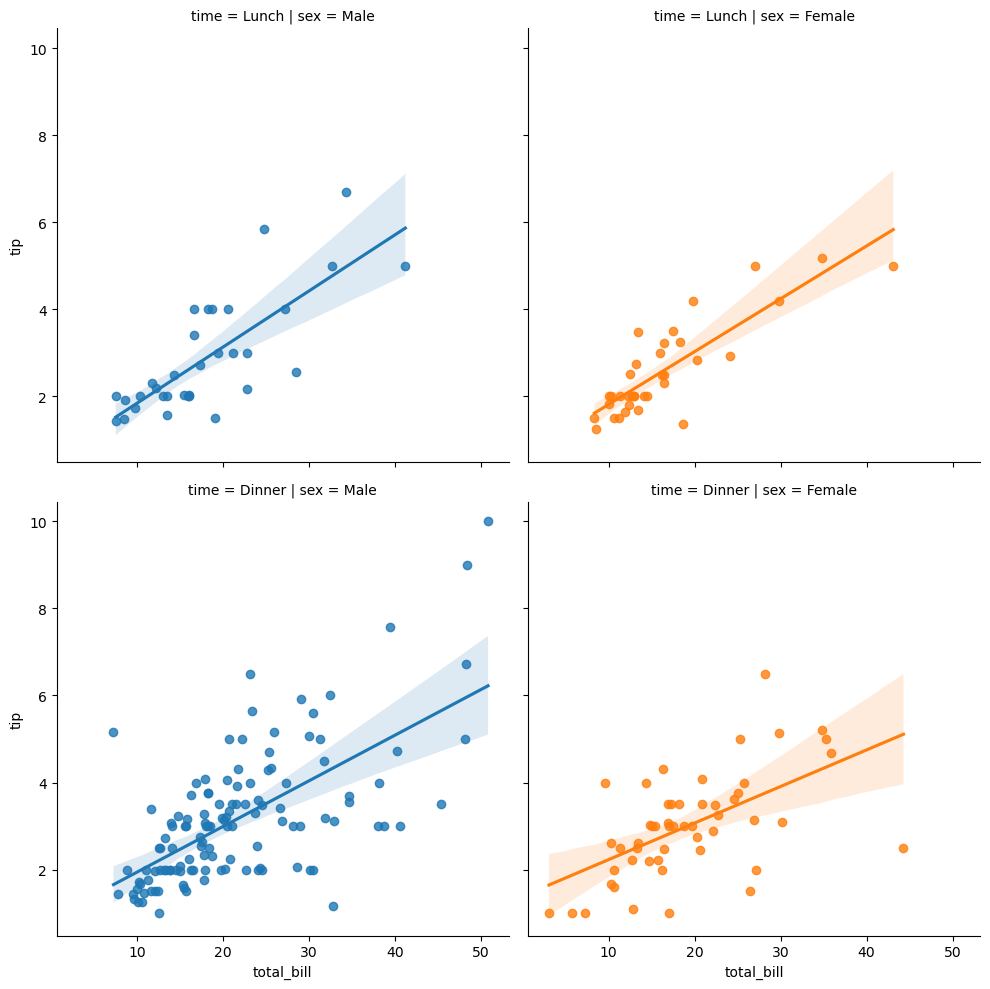

In [390]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',hue='sex')

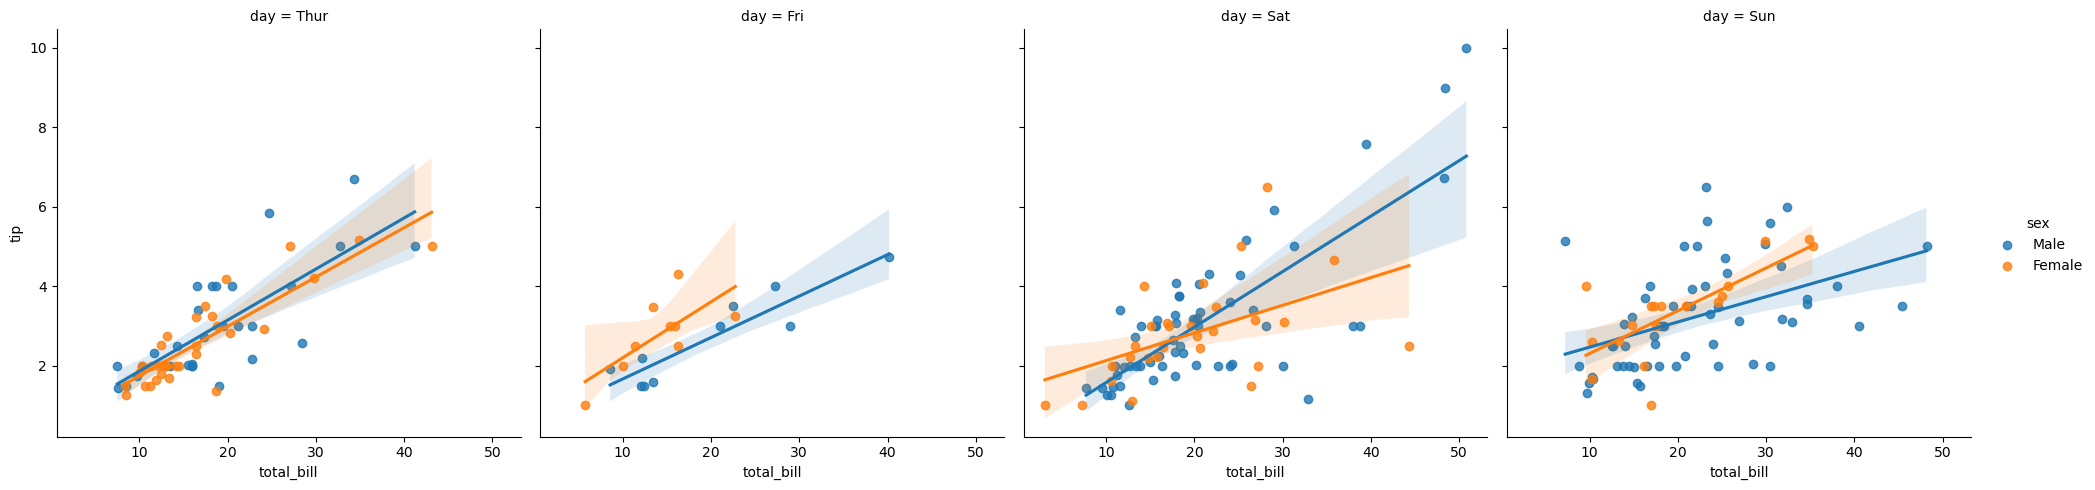

In [386]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')

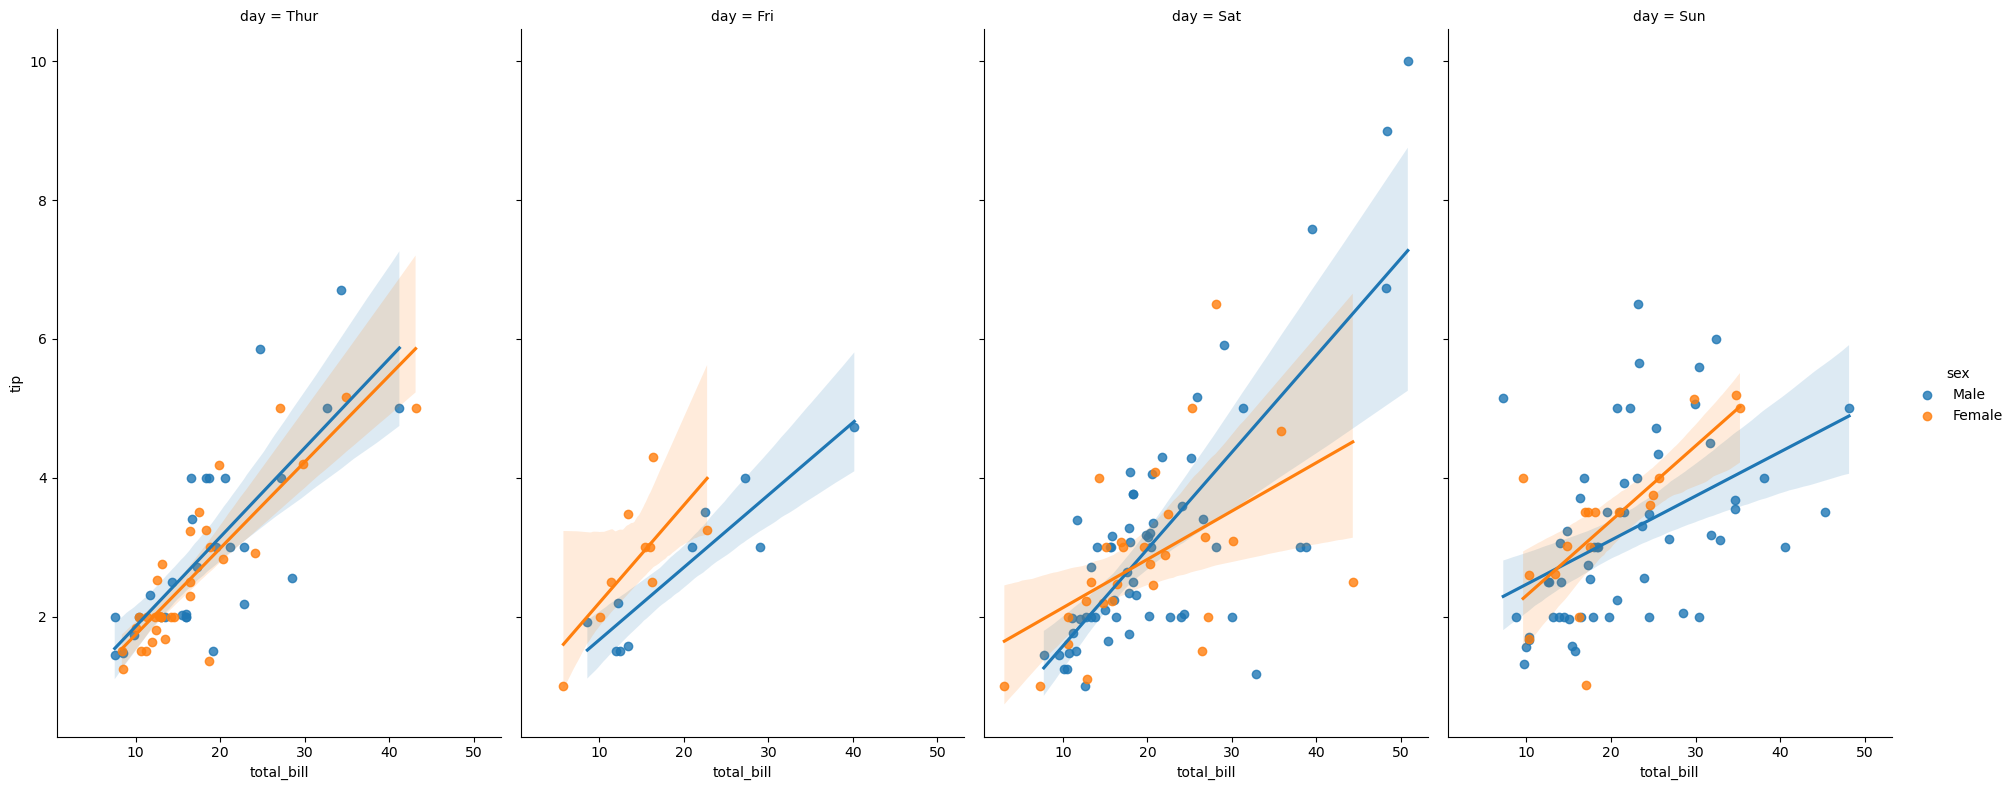

In [397]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',
          aspect=0.6,height=8)

## **Seaborn 6 - Style & Color**

In [403]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='sex', ylabel='count'>

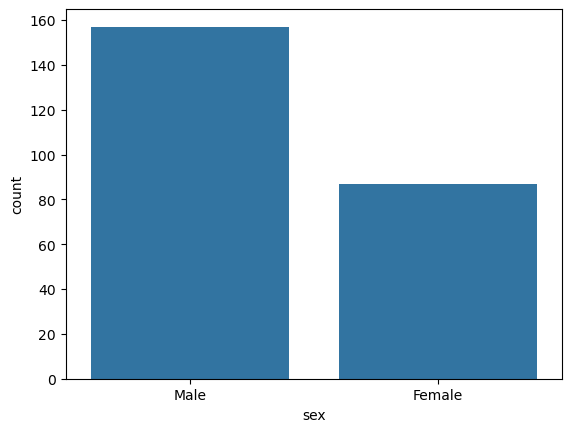

In [405]:
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

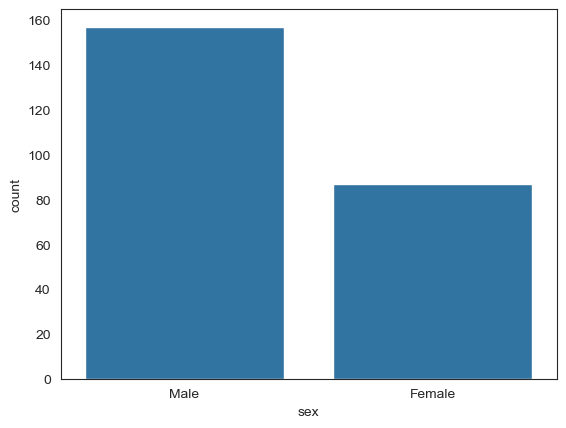

In [408]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

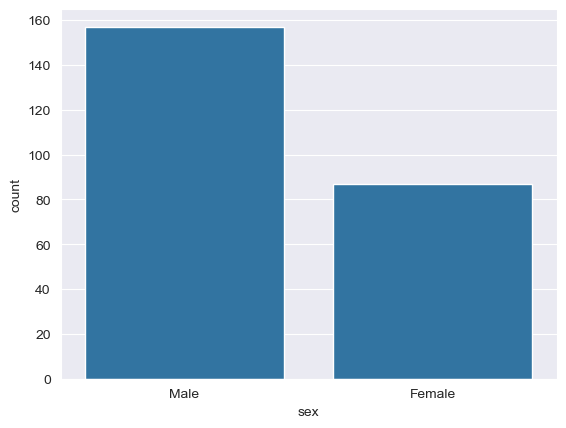

In [411]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

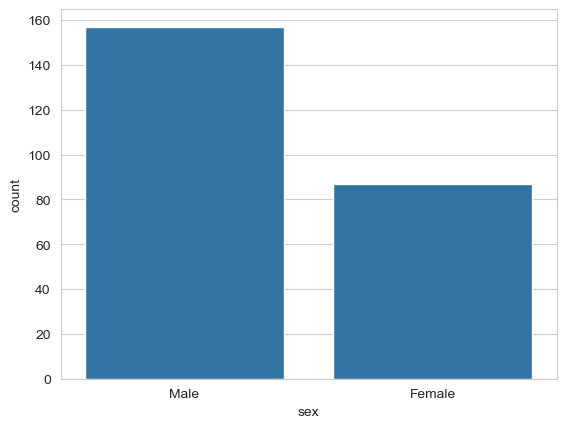

In [414]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

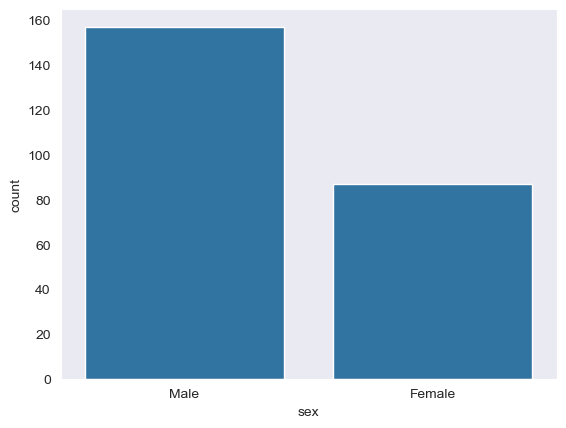

In [417]:
sns.set_style('dark')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

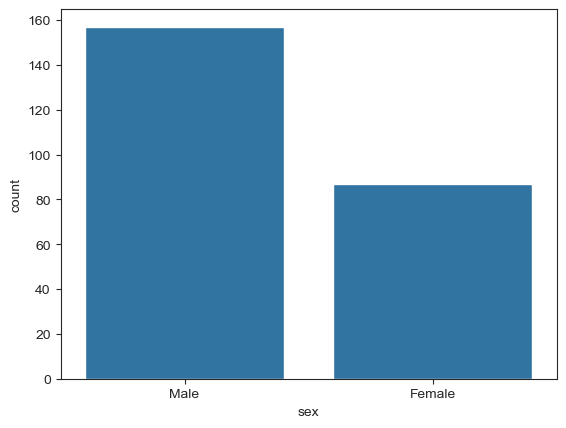

In [420]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

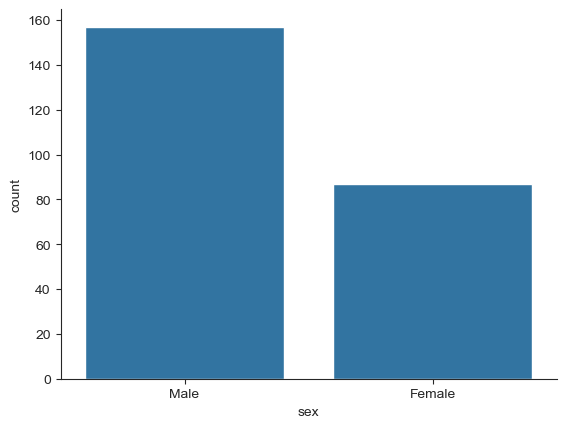

In [422]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine()
#despine removes top and right border

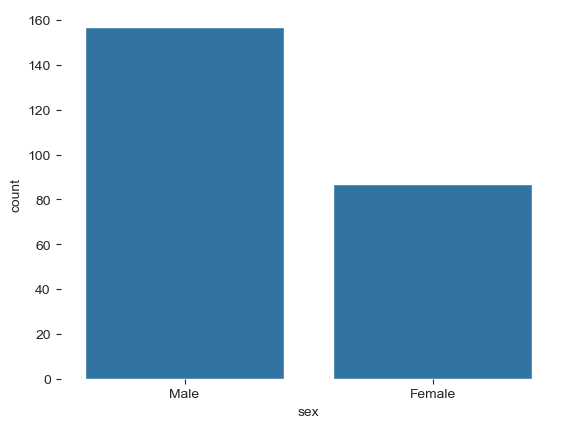

In [425]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True)

<Axes: xlabel='sex', ylabel='count'>

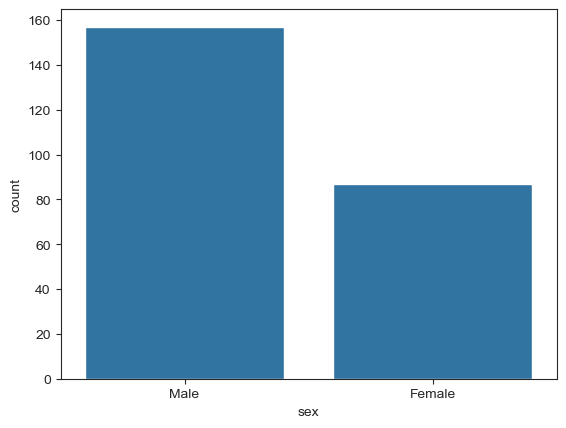

In [428]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

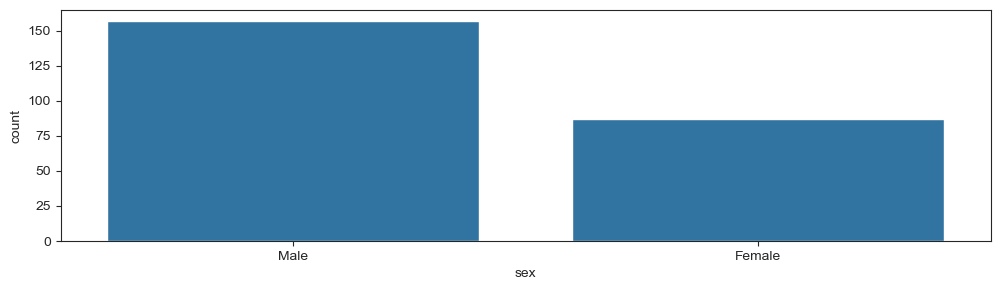

In [431]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

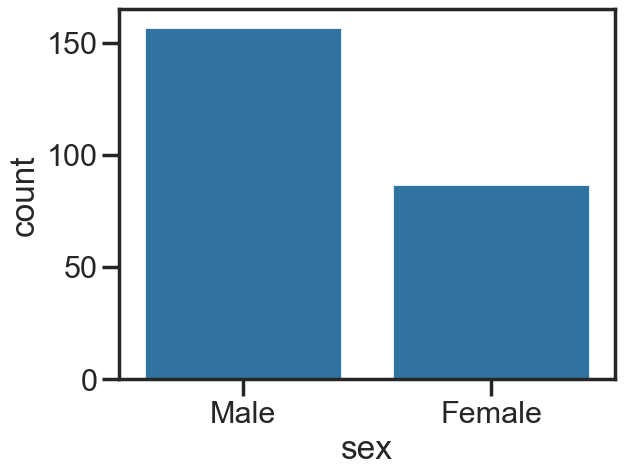

In [436]:
sns.set_context('poster') #makes larger image
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

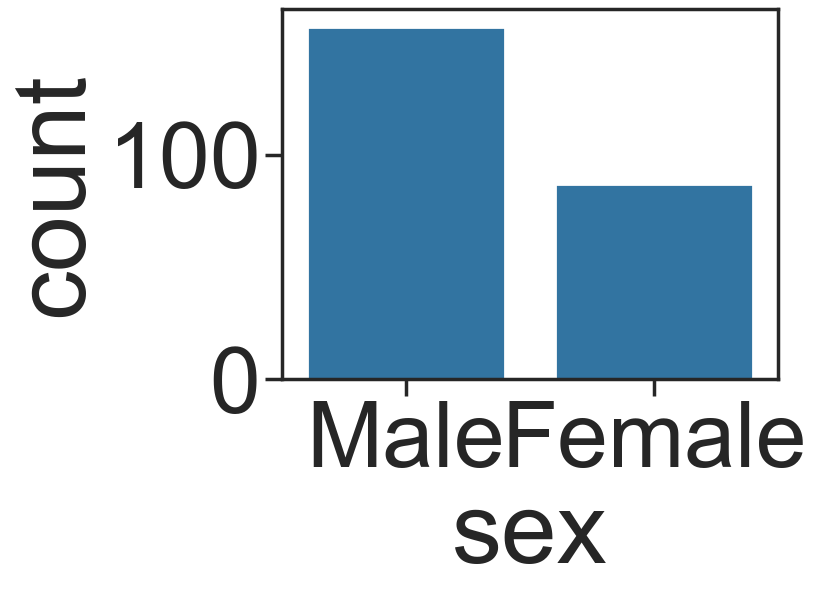

In [439]:
sns.set_context('poster',font_scale=3)
sns.countplot(x='sex',data=tips)

<Axes: xlabel='sex', ylabel='count'>

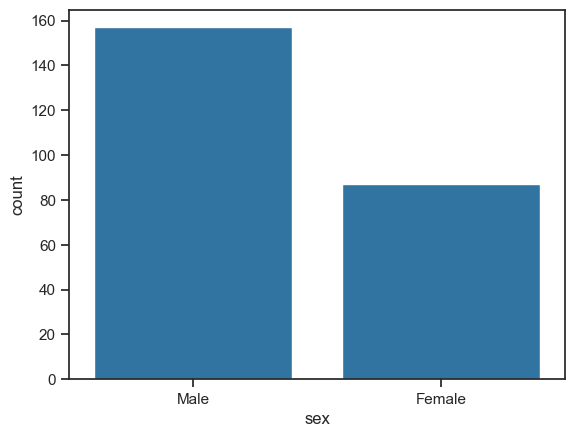

In [444]:
sns.set_context('notebook') #notebook is default
sns.countplot(x='sex',data=tips)

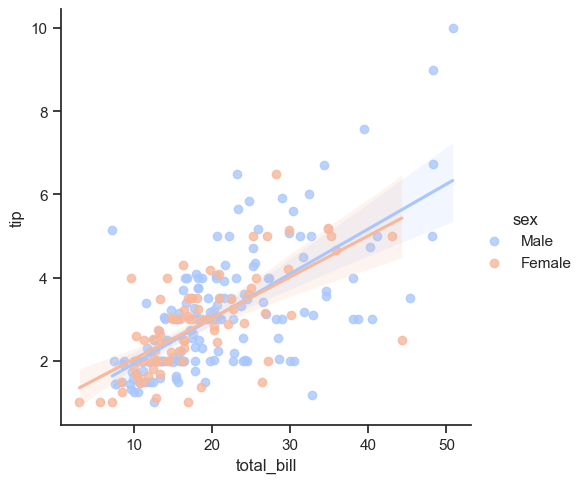

In [449]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

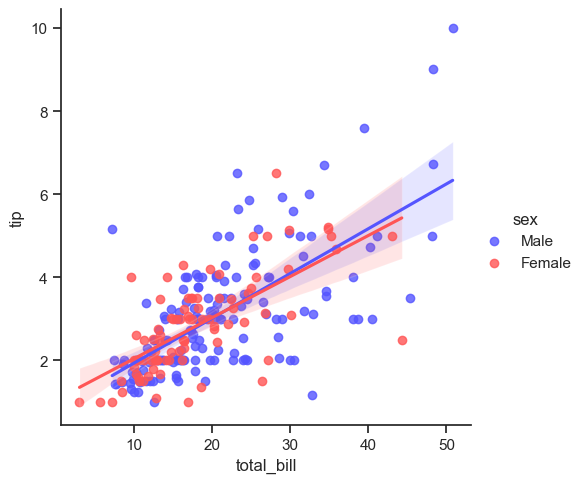

In [452]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic')

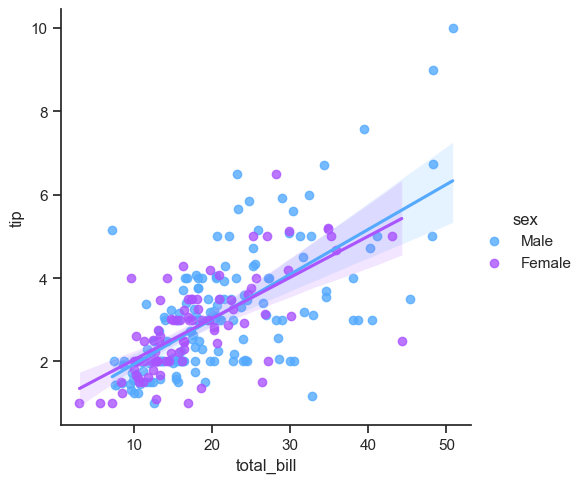

In [455]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='cool')

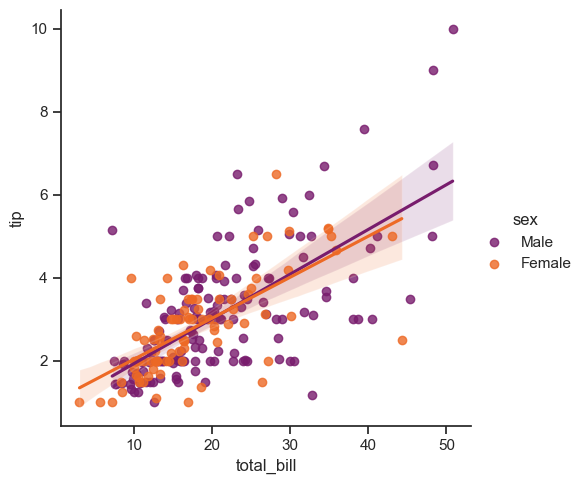

In [464]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='inferno')
#color codes can be checked at matplotlib color palette page

## **The End**